# Main Experiments
    refer mainRTain_test.py
    July 21 2025

In [1]:
import os
import numpy as np
import pandas as pd

from datetime import datetime

from datetime import datetime

from Core.models import CModels
from Core.dataset import CDataset, CDatasetWrapper
from Core.plots import CPlots

from mainRTrain_test import Run_RTrain, Run_RV
from Core.tSNE import tSNEPlots, Beth, Kyoto

# train_test_split setting
bShuffle = False
aStratify = None 
aRS = None

# Configure Dataset

## <font color='red'> KYOTO </font>

### Configure

In [ ]:
cDATA = 'Kyoto'

objDS = CDataset()

strFileName =  r'../DATA/Kyoto2015DS.csv'
#strPath = os.path.join(strRoot, strFileName)
listData, listLabel = objDS.GetKyotoDataset(strFileName)
print('Kyoto:', listData.shape, listLabel.shape)

fTestSize = 0.9 # Test size for computing models' performance
nEPOCHS = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]

CDataset Object Created
label
0    30000
1    30000
dtype: int64
Kyoto: (60000, 13) (60000, 1)


### Add synthetic data

In [ ]:
strSynFileName = '../DATA/Kyoto_Syn_3000.csv'
dfSyn = pd.read_csv(strSynFileName, delimiter=',')
dfSyn['Label'] = 1
print(dfSyn.shape)

listSynLabel = dfSyn['Label'].to_numpy().reshape(-1,1)
print(listSynLabel.shape)

listSynData = dfSyn.drop('Label', axis=1)
print(listSynData.shape)

listData = np.vstack([listData, listSynData])
listLabel = np.vstack([listLabel, listSynLabel])
print('Kyoto:', listData.shape, listLabel.shape)

bShuffle = True
aStratify = 'y' 
aRS = None

### Add adversarial data

In [3]:
strAdvFileName = '../DATA/Kyoto_Adv_3000.csv'
listAdv = np.loadtxt(strAdvFileName, delimiter=',')
print(listAdv.shape, listAdv[:,0:13].shape)

listData = np.vstack((listData, listAdv[:,0:13]))
listLabel = np.vstack((listLabel, listAdv[:,13].reshape(-1,1)))
print('Kyoto:', listData.shape, listLabel.shape)

bShuffle = True
aStratify = 'y' 
aRS = None

(3000, 14) (3000, 13)
Kyoto: (63000, 13) (63000, 1)


### TSNE

In [ ]:
objDS = CDataset()
strFileName = r'../DATA/Kyoto2015DS.csv'
df = Kyoto(objDS, strFileName, True)

strOutputFile = './local-data/tsneKyoto_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

#### All 60k Samples

In [ ]:
listDS = np.hstack((listData, listLabel))
print(listDS.shape)

# Here add header to the dataset and also add labels 
dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)


## <font color='red'> BETH </font>

#### VARIANT 2: OOS

In [3]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_OOS(strFileName)

CDatasetWrapper Object Created
CDataset Object Created
sus
0    870867
1    156103
dtype: int64
(1026970, 6) (1026970, 1)
Total: (1026970, 6) Training: (856900, 6) Testing: (170070, 6)
(856900, 6) (170070, 6)
[0 1] [855046   1854]
[0 1] [ 15821 154249]


In [ ]:
strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)

print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)
fTestSize = 0.1656035
nEPOCHS = 10

#### VARIANT 1: IS

In [ ]:
oDW = CDatasetWrapper()
strFileName = r'../DATA/Beth_16Aug2023.csv'
oDW.DS_BETH_IS(strFileName)

CDatasetWrapper Object Created
CDataset Object Created
sus
0    870867
1    156103
dtype: int64
(1026970, 6) (1026970, 1)
Total: (1026970, 6) Training: (102697, 6) Testing: (924273, 6)
(102697, 6) (924273, 6)
[0 1] [87052 15645]
[0 1] [783815 140458]


In [ ]:
cDATA = 'Beth'
objDS = CDataset()

strFileName =  r'../DATA/Beth_16Aug2023.csv'
listData, listLabel = objDS.GetBethDataset(strFileName)
print('Beth:', listData.shape, listLabel.shape)
unique_labels, counts = np.unique(listLabel, return_counts=True)
print('Unique labels:', unique_labels, 'Counts:', counts)

#fTestSize = 0.1656035
#nEPOCHS = 10

CDataset Object Created
sus
0    870867
1    156103
dtype: int64
Beth: (1026970, 6) (1026970, 1)
Unique labels: [0 1] Counts: [870867 156103]


#### TSNE

In [ ]:
objDS = CDataset()

strFileName = r'../DATA/Beth_16Aug2023.csv'
df = Beth(objDS, strFileName, nExp=1)
df = df.sample(frac=0.1)
print('Sampled: ', df['Labels'].value_counts())

strOutputFile = './local-data/tsneBeth_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

## <font color='red'> MNIST </font>

In [ ]:
cDATA = 'Digit'

objDS = CDataset()
listData, listLabel = objDS.PrepareMNISTDS()
print(listData.shape, listLabel.reshape(-1, 1).shape)

strOutputFile = './local-data/tsneDigit_train.pdf'

listDS = np.hstack((listData, listLabel.reshape(-1, 1)))
print(listDS.shape)

dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

# <font color='blue'>NEW RUN TEST</font>

## Set Output Path

In [3]:
# Generate output directory
strOutDir = datetime.now().strftime('%Y_%m_%d')
print(strOutDir)
strDirPath = os.path.join(os.getcwd(), 'local-data', cDATA + '_' + strOutDir)
if not os.path.isdir(strDirPath):
    os.makedirs(strDirPath)


2025_10_19


## Run_RTrain

Combination - D:  3 A:  3
CModels Object Created
TrainPercent: [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
Train size Fraction: 0.05
predictDA::DATA_D: (300, 13) (300,) [0 1] [147 153]
predictDA::DATA_A: (300, 13) (300,) [0 1] [147 153]
predictDA::DATA_D: (300, 13) (300,) [0 1] [161 139]
predictDA::DATA_A: (300, 13) (300,) [0 1] [156 144]
predictDA::DATA_D: (300, 13) (300,) [0 1] [150 150]
predictDA::DATA_A: (300, 13) (300,) [0 1] [140 160]
predictDA::DATA_D: (300, 13) (300,) [0 1] [151 149]
predictDA::DATA_A: (300, 13) (300,) [0 1] [157 143]
predictDA::DATA_D: (300, 13) (300,) [0 1] [156 144]
predictDA::DATA_A: (300, 13) (300,) [0 1] [155 145]
predictDA::DATA_D: (300, 13) (300,) [0 1] [145 155]
predictDA::DATA_A: (300, 13) (300,) [0 1] [160 140]
predictDA::DATA_D: (300, 13) (300,) [0 1] [158 142]
predictDA::DATA_A: (300, 13) (300,) [0 1] [149 151]
predictDA::DATA_D: (300, 13) (300,) [0 1] [160 140]
predictDA::DATA_A: (300, 13) 

<Figure size 640x480 with 0 Axes>

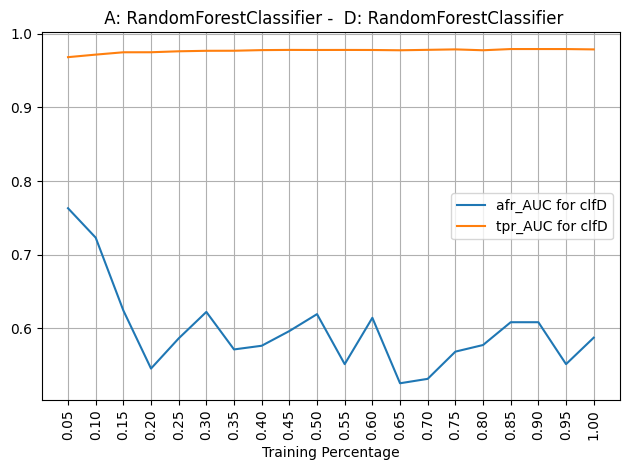

<Figure size 640x480 with 0 Axes>

In [ ]:
Run_RTrain(strDirPath, fTestSize, listSelectedClassifier,
           listData, listLabel, nEPOCHS, nSteps,
           bShuffle, aStratify, aRS)

## <font color='green'>Run_RV</font>

## Load previous results
    Set Local Path - If not a new run

In [ ]:
strDirPath = r'./local-data/Kyoto_2025_07_22'
strDirPath = r'./local-data/Kyoto_2025_08_17'

## If fresh run donot set the above path

In [ ]:
Run_RV(strDirPath, fTestSize, listSelectedClassifier,
        listData, listLabel, nEPOCHS, nSteps,
        bShuffle, aStratify, aRS)

CModels Object Created
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
rw100 =  0  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.979
np.mean(afr_aucRs) 0.019
rw100 =  5  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.978
np.mean(afr_aucRs) 0.374
rw100 =  10  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.976
np.mean(afr_aucRs) 0.44
rw100 =  15  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.974
np.mean(afr_aucRs) 0.489
rw100 =  20  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.974
np.mean(afr_aucRs) 0.523
rw100 =  25  repeats =  10
np.mean(tpr_aucAs) 0.981
np.mean(tpr_aucRs) 0.973
np.mean(afr_aucRs) 0.545
rw100 =  30  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.971
np.mean(afr_aucRs) 0.549
rw100 =  35  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.967
np.mean(afr_aucRs) 0.566
rw100 =  40  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.964


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# <font color='blue'>Use nbPlotResults to generate final plots</font>